In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = pd.read_csv('2019.csv')

df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


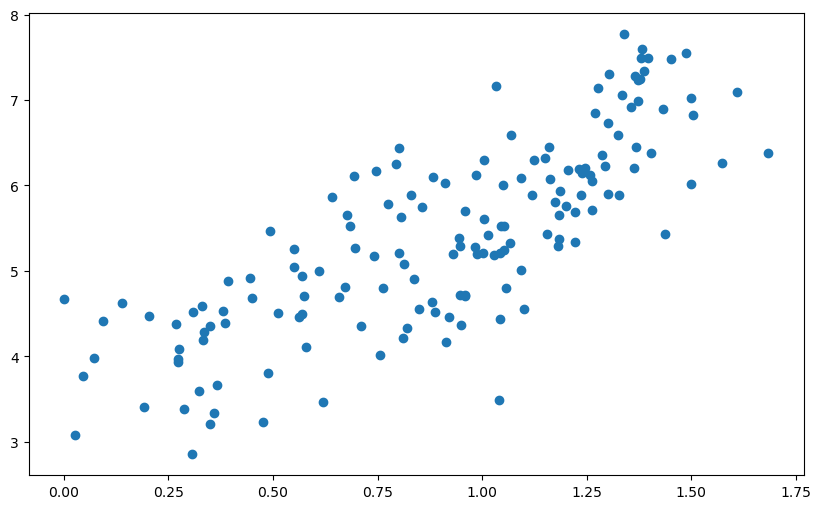

In [2]:
y = df['Score']
x = df['GDP per capita']

plt.figure(figsize=(10,6))


plt.scatter(x,y)
plt.show()

Regressão:
y = 0.7650174035037318 x² + 0.9491447857986646x + 3.8     R² = 0.64 


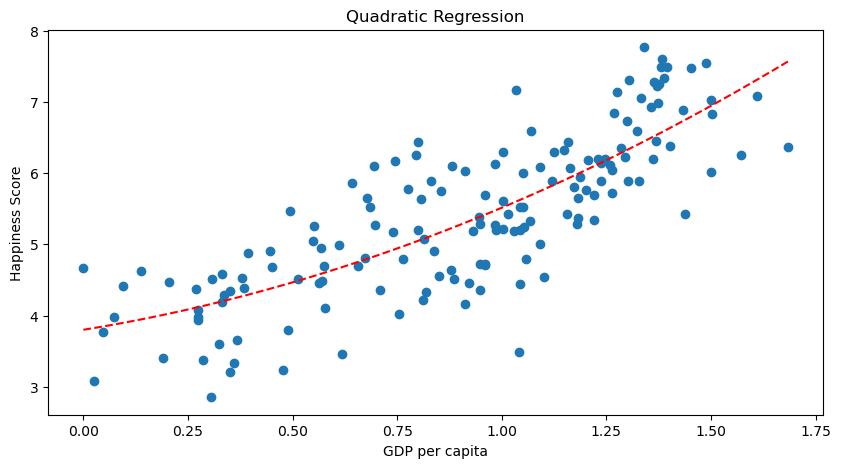

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Dados de exemplo
X = df['GDP per capita'].values.reshape(-1, 1)  # Variável explicativa
y = df['Score']  # Variável explicada

# Transformar as features em polinômios de grau 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Criar e ajustar o modelo de regressão linear
reg = LinearRegression().fit(X_poly, y)

coef = reg.coef_
c = reg.intercept_

# Calcular R²
r2 = reg.score(X_poly,y)

# Imprimir a função da regressão
print(f"Regressão:\ny = {coef[2]} x² + {coef[1]}x + {round(c,2)}     R² = {round(r2, 2)} ")

# Y = (coef[2] * X ** 2) + (coef[1] * X)+ c

# Gerar valores para a variável explicativa
x_values = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Prever os valores correspondentes da variável explicada usando o modelo ajustado
y_pred = reg.predict(poly_features.transform(x_values))

plt.figure(figsize= (10,5))

plt.title("Quadratic Regression")
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score')

plt.scatter(X,y)

plt.plot(x_values, y_pred, '--r')

plt.show()